<a href="https://colab.research.google.com/github/vageeshmaiya/GC-Former-Battery/blob/main/GC_former_Battery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mounting Drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Changing Directory path**

###### **Steps To Follow**

1. Once the drive has been mounted go to the files icon visible on the left hand side.

2. Click on the drive folder.

3. There find the folder containing the run_longExp.py file.

4. Right click on the folder and click on the folder and select the copy path option.

5. Make sure to copy and paste the path of the folder containing the run_longExp.py file in the code below.

6. The path of the folder in the code below is ``/content/drive/MyDrive/GCformer-main``

In [10]:
%cd /content/drive/MyDrive/GCformer-main
!ls

/content/drive/MyDrive/GCformer-main
checkpoints    exp     README.md	 result.txt	 test_results
data	       layers  requirements.txt  run_longExp.py  utils
data_provider  models  results		 scripts


### **Installing Requirements**

In [11]:
pip install -r requirements.txt

In [4]:
!pip3 install --force einops==0.4.1

  Using cached einops-0.4.1-py3-none-any.whl (28 kB)
  Attempting uninstall: einops
    Found existing installation: einops 0.4.1
    Uninstalling einops-0.4.1:
      Successfully uninstalled einops-0.4.1


In [5]:
!pip install OmegaConf

### **Running the main code**

In [12]:
!python -u run_longExp.py --model GCformer --data Battery --features M --freq t

Args in experiment:
Namespace(random_seed=2023, model='GCformer', data='Battery', root_path='./data/ETT/', data_path='dataset4.csv', features='M', target='Voltage', freq='t', checkpoints='./checkpoints/', context_len=96, seq_len=96, label_len=48, pred_len=96, fc_dropout=0.05, head_dropout=0.0, patch_len=16, stride=8, padding_patch='end', local_revin=0, affine=0, subtract_last=0, decomposition=0, kernel_size=25, individual=1, embed_type=0, enc_in=3, enc_raw=3, dec_in=3, c_out=3, d_model=128, n_heads=8, e_layers=3, global_layers=1, d_layers=1, d_ff=512, moving_avg=25, factor=1, distil=True, dropout=0.05, embed='timeF', activation='gelu', do_predict=False, h_token=512, h_channel=32, perturb_ratio=0, global_model='Gconv', norm_type='revin', weight_decay=0, local_bias=0.5, global_bias=0.5, atten_bias=0.5, TC_bias=1, num_workers=10, itr=3, train_epochs=100, batch_size=128, patience=100, learning_rate=0.0001, des='test', loss='mse', lradj='type3', pct_start=0.3, use_amp=False, use_gpu=True, g

### **Plotting Results**

##### **Changing Directory path**

1. Once the code is run a results folder will be created in the GCformer-main folder under the folder name `results`.

2. Copy the path for either one of the folders and paste it in the code below.

3. The path of the used in the code below is ``/content/drive/MyDrive/GCformer-main/results/GCformer_Gconv_ETTh1_sl96_cl96_pl96_nchannel32_ntoken512_nhead8_d128_df512el3_dl1_attenBias0.5_TCbias1_dp0.05_Lbias0.5_Gbias0.5_revin_noise0_decay0_lr0.0001_decompose0_individual1``


In [ ]:
%cd /content/drive/MyDrive/GCformer-main/results/GCformer_Gconv_ETTh1_sl96_cl96_pl96_nchannel32_ntoken512_nhead8_d128_df512el3_dl1_attenBias0.5_TCbias1_dp0.05_Lbias0.5_Gbias0.5_revin_noise0_decay0_lr0.0001_decompose0_individual1
!ls

/content/drive/MyDrive/GCformer-main/results/GCformer_Gconv_ETTh1_sl96_cl96_pl96_nchannel32_ntoken512_nhead8_d128_df512el3_dl1_attenBias0.5_TCbias1_dp0.05_Lbias0.5_Gbias0.5_revin_noise0_decay0_lr0.0001_decompose0_individual1
metrics.npy  pred.npy  true.npy  x.npy


In [ ]:
#IMporting requirements for plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


preds = np.load('pred.npy') #Predicted parameters
trues = np.load('true.npy') #Groundtruth paremeters

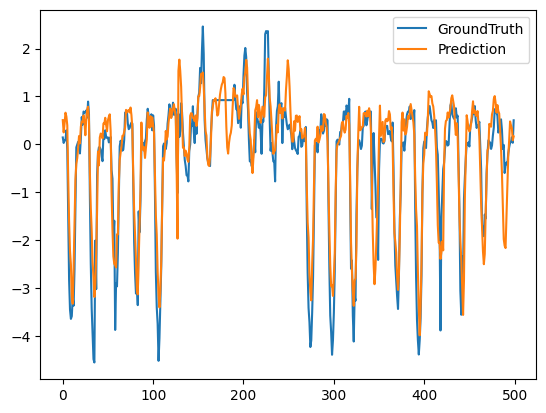

In [ ]:
plt.figure()
plt.plot(trues[:500,2,-1], label='GroundTruth')
plt.plot(preds[:500,2,-1], label='Prediction')
#plt.yticks([2.5,3,3.5,4,4.5,5])
plt.legend()
plt.show()